# ML Zoomcamp - Homework lesson 4 - 2024

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

## Get data

In [ ]:
!wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip


--2024-10-10 11:45:54--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank+marketing.zip.1’

bank+marketing.zip.     [  <=>               ] 999.85K  3.36MB/s    in 0.3s    

2024-10-10 11:45:55 (3.36 MB/s) - ‘bank+marketing.zip.1’ saved [1023843]



In [ ]:
zip_path = '/content/bank+marketing.zip'

import zipfile
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content')

In [ ]:
zip_path = '/content/bank.zip'

import zipfile
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content')

In [ ]:
import pandas as pd

csv_path = '/content/bank-full.csv'
df = pd.read_csv(csv_path, sep=";")
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
columns_to_use = ['age', 'job', 'marital', 'education', 'balance', 'housing',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y']


In [ ]:
df2 = df[columns_to_use]
df2.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df2.columns


Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'y'],
      dtype='object')

In [ ]:
numerical = df2.select_dtypes(['int64']).columns.tolist()
numerical

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
df2.y = (df2.y == 'yes').astype(int)


<ipython-input-50-5a55016cb326>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.y = (df2.y == 'yes').astype(int)


In [ ]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

del df_train['y']
del df_val['y']
del df_test['y']

## Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

For each numerical variable, use it as score and compute AUC with the above_average variable
Use the training dataset for that
If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['engine_hp'])

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- balance
- day
- duration
- previous

For each numerical variable, use it as score and compute AUC with the above_average variable

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

for n in numerical:
  auc = roc_auc_score(y_train, df_train[n])
  if auc < 0.5:
    auc = roc_auc_score(y_train, -df_train[n])
  print('%16s, %.3f' % (n, auc))

             age, 0.512
         balance, 0.589
             day, 0.526
        duration, 0.815
        campaign, 0.571
           pdays, 0.590
        previous, 0.599


**Answer**: duration.

## Question 2: Training the model

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:


```

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```



What's the AUC of this model on the validation dataset? (round to 3 digits)


- 0.69
- 0.79
- 0.89
- 0.99

In [ ]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

# y_train = (y_train == 'yes').astype(int)

train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

model.fit(X_train, y_train)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = model.predict(X_val)
y_pred = (y_pred == 'yes').astype(int)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# calcolo del roc_auc_score

roc_auc_total = roc_auc_score(y_val, y_pred)
round (roc_auc_total, 3)

0.658

**Answer**: 0.69?

## Question 3: Precision and Recall

Now let's compute precision and recall for our model.

Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
For each threshold, compute precision and recall

Plot them

At which threshold precision and recall curves intersect?

- 0.265
- 0.465
- 0.665
- 0.865

In [ ]:
y_pred_proba = model.predict_proba(X_val)[:, 1]  # Probabilities for class 1 ("yes")
y_pred_proba

array([0.03085489, 0.02351931, 0.02062284, ..., 0.2524939 , 0.00139584,
       0.04183733])

In [ ]:
def confusion_matrix_dataframe(y_val, y_pred):

  scores = []
  tresholds = np.arange(0.0, 1.0, 0.01)

  for t in tresholds:
    actual_positives = (y_val == 1)
    actual_negatives = (y_val == 0)

    predict_positives = (y_pred >= t)
    predict_negatives = (y_pred < t)

    true_positives = (predict_positives & actual_positives).sum()
    true_negatives = (predict_negatives & actual_negatives).sum()

    false_positives = (predict_positives & actual_negatives).sum()
    false_negatives = (predict_negatives & actual_positives).sum()

    scores.append((t, true_positives, true_negatives, false_positives, false_negatives))

  scores_columns = ('treshold', 'tp', 'tn', 'fp', 'fn')
  df_scores = pd.DataFrame(scores, columns = scores_columns)
  return df_scores




In [ ]:
unique_values, counts = np.unique(y_pred, return_counts=True)
for value, count in zip(unique_values, counts):
  print(f"Values {value}: {count} occurrences")

Values 0: 8471 occurrences
Values 1: 571 occurrences


In [ ]:
y_val = (y_val == 'yes').astype(int)

In [ ]:
unique_values, counts = np.unique(y_val, return_counts=True)
for value, count in zip(unique_values, counts):
  print(f"Values {value}: {count} occurrences")

Values 0: 7944 occurrences
Values 1: 1098 occurrences


In [ ]:
unique_values, counts = np.unique(y_pred, return_counts=True)
for value, count in zip(unique_values, counts):
  print(f"Values {value}: {count} occurrences")

Values 0: 8471 occurrences
Values 1: 571 occurrences


In [ ]:
dfs = confusion_matrix_dataframe(y_val, y_pred)
dfs

,treshold,tp,tn,fp,fn
0,0.00,1098,0,7944,0
1,0.01,374,7747,197,724
2,0.02,374,7747,197,724
3,0.03,374,7747,197,724
4,0.04,374,7747,197,724
...,...,...,...,...,...
95,0.95,374,7747,197,724
96,0.96,374,7747,197,724
97,0.97,374,7747,197,724
98,0.98,374,7747,197,724


In [ ]:
dfs['precision'] = dfs.tp / (dfs.tp + dfs.fp)
dfs['recall'] = dfs.tp / (dfs.tp + dfs.fn)

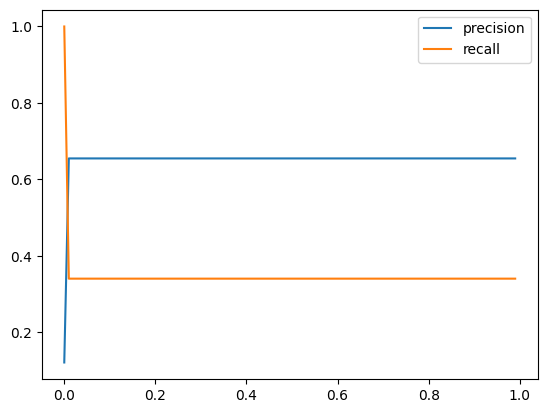

In [ ]:
plt.plot(dfs.treshold, dfs.precision, label = 'precision')
plt.plot(dfs.treshold, dfs.recall, label = 'recall')

plt.legend()
plt.show()

In [ ]:
def confusion_matrix_dataframe(y_val, y_pred_proba):
    scores = []
    thresholds = np.arange(0.0, 1.0, 0.01)

    for t in thresholds:
        actual_positives = (y_val == 1)
        actual_negatives = (y_val == 0)

        predict_positives = (y_pred_proba >= t)
        predict_negatives = (y_pred_proba < t)

        true_positives = (predict_positives & actual_positives).sum()
        true_negatives = (predict_negatives & actual_negatives).sum()

        false_positives = (predict_positives & actual_negatives).sum()
        false_negatives = (predict_negatives & actual_positives).sum()

        scores.append((t, true_positives, true_negatives, false_positives, false_negatives))

    scores_columns = ('threshold', 'tp', 'tn', 'fp', 'fn')
    df_scores = pd.DataFrame(scores, columns=scores_columns)
    return df_scores


In [ ]:
y_pred_proba = model.predict_proba(X_val)[:, 1]  # Probabilities for the positive class
dfs = confusion_matrix_dataframe(y_val, y_pred_proba)

In [ ]:
dfs

,threshold,tp,tn,fp,fn
0,0.00,1098,0,7944,0
1,0.01,1094,1027,6917,4
2,0.02,1093,2247,5697,5
3,0.03,1084,3294,4650,14
4,0.04,1070,4200,3744,28
...,...,...,...,...,...
95,0.95,40,7925,19,1058
96,0.96,34,7926,18,1064
97,0.97,28,7930,14,1070
98,0.98,21,7935,9,1077


In [ ]:
dfs['precision'] = dfs.tp / (dfs.tp + dfs.fp)
dfs['recall'] = dfs.tp / (dfs.tp + dfs.fn)

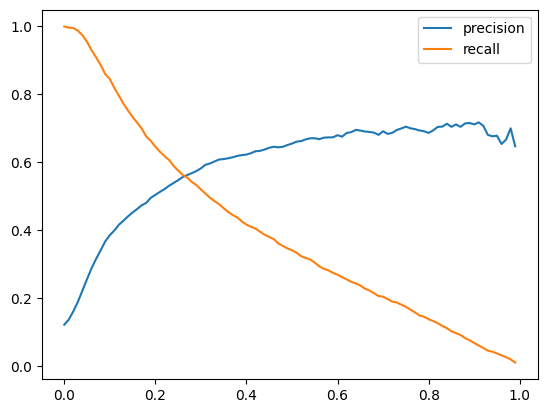

In [ ]:
plt.plot(dfs.threshold, dfs.precision, label = 'precision')
plt.plot(dfs.threshold, dfs.recall, label = 'recall')

plt.legend()
plt.show()

**Answer**: 0.265

## Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

 $F_1 =  2 \times \frac{P \times R} {P + R}$

Where
 $P$ is precision and
 $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.02
- 0.22
- 0.42
- 0.62

In [ ]:
dfs['f1'] = 2 * (dfs.precision * dfs.recall) / (dfs.precision + dfs.recall)
dfs


,threshold,tp,tn,fp,fn,precision,recall,f1
0,0.00,1098,0,7944,0,0.121433,1.000000,0.216568
1,0.01,1094,1027,6917,4,0.136562,0.996357,0.240202
2,0.02,1093,2247,5697,5,0.160972,0.995446,0.277130
3,0.03,1084,3294,4650,14,0.189048,0.987250,0.317330
4,0.04,1070,4200,3744,28,0.222268,0.974499,0.361976
...,...,...,...,...,...,...,...,...
95,0.95,40,7925,19,1058,0.677966,0.036430,0.069144
96,0.96,34,7926,18,1064,0.653846,0.030965,0.059130
97,0.97,28,7930,14,1070,0.666667,0.025501,0.049123
98,0.98,21,7935,9,1077,0.700000,0.019126,0.037234


In [ ]:
treshold_values = [0.02, 0.22, 0.42, 0.62]

results = dfs[dfs['threshold'].isin(treshold_values)]
results

,threshold,tp,tn,fp,fn,precision,recall,f1
2,0.02,1093,2247,5697,5,0.160972,0.995446,0.277130
22,0.22,679,7319,625,419,0.520706,0.618397,0.565362
42,0.42,444,7686,258,654,0.632479,0.404372,0.493333
62,0.62,280,7816,128,818,0.686275,0.255009,0.371846


**Answer**: 0.22

## Question 5: 5-Fold CV

Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:


```
KFold(n_splits=5, shuffle=True, random_state=1)
```

Iterate over different folds of df_full_train

Split the data into train and validation

Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

Use AUC to evaluate the model on validation

How large is standard deviation of the scores across different folds?


- 0.0001
- 0.006
- 0.06
- 0.26

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

X = df_full_train.drop(columns=['y'])  # Features
y = df_full_train['y']  # Target variable

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

auc_scores = []

for train_index, val_index in kfold.split(X):
    df_train = X.iloc[train_index]
    df_val = X.iloc[val_index]
    y_train = y.iloc[train_index]
    y_val = y.iloc[val_index]

    train_dicts = df_train.to_dict(orient='records')
    val_dicts = df_val.to_dict(orient='records')

    dv = DictVectorizer()
    X_train = dv.fit_transform(train_dicts)
    X_val = dv.transform(val_dicts)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)

    y_pred_proba = model.predict_proba(X_val)[:, 1]  # Get probabilities for class 1 (positive class)

    auc = roc_auc_score(y_val, y_pred_proba)
    auc_scores.append(auc)

std_dev = np.std(auc_scores)

print("AUC scores for each fold:", auc_scores)
print("Standard deviation of AUC scores:", std_dev)


AUC scores for each fold: [0.8998636821956679, 0.9011043010899575, 0.9116863227865895, 0.908721062604314, 0.9129330979152199]
Standard deviation of AUC scores: 0.005398443893771979


**Answer**: 0.06

## Question 6: Hyperparameter Tuning

Now let's use 5-Fold cross-validation to find the best parameter C


Iterate over the following C values: [0.01, 0.1, 0.5, 10]

Initialize KFold with the same parameters as previously

Use these parameters for the model:

LogisticRegression(solver='liblinear', C=C, max_iter=1000)

Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which C leads to the best mean score?

- 0.000001
- 0.001
- 1

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C.

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

# Assuming df_full_train is your full dataset
X = df_full_train.drop(columns=['y'])  # Features
y = df_full_train['y']  # Target variable

# Initialize KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

# Dictionary to store mean and std for each C value
results = {}

# Values of C to iterate over
C_values = [0.000001, 0.001, 1]

for C in C_values:
    auc_scores = []

    # Perform 5-fold cross-validation
    for train_index, val_index in kfold.split(X):
        df_train = X.iloc[train_index]
        df_val = X.iloc[val_index]
        y_train = y.iloc[train_index]
        y_val = y.iloc[val_index]

        # Convert to dictionary for DictVectorizer
        train_dicts = df_train.to_dict(orient='records')
        val_dicts = df_val.to_dict(orient='records')

        # Vectorize features
        dv = DictVectorizer()
        X_train = dv.fit_transform(train_dicts)
        X_val = dv.transform(val_dicts)

        # Initialize and train the model with the current value of C
        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model.fit(X_train, y_train)

        # Predict probabilities for validation set
        y_pred_proba = model.predict_proba(X_val)[:, 1]

        # Compute AUC for the current fold
        auc = roc_auc_score(y_val, y_pred_proba)
        auc_scores.append(auc)

    # Calculate mean and std of AUC scores for current C
    mean_auc = np.mean(auc_scores)
    std_auc = np.std(auc_scores)

    # Store results, rounding to 3 decimal places
    results[C] = (round(mean_auc, 3), round(std_auc, 3))

# Find the C with the highest mean score
best_C = min(results, key=lambda x: (-results[x][0], results[x][1]))

# Print all the results and the best C
for C, (mean_score, std_score) in results.items():
    print(f"C={C}: Mean AUC={mean_score}, Std AUC={std_score}")

print(f"\nBest C: {best_C}")


C=1e-06: Mean AUC=0.702, Std AUC=0.009
C=0.001: Mean AUC=0.865, Std AUC=0.007
C=1: Mean AUC=0.907, Std AUC=0.005

Best C: 1


**Answer**: 0.1